In [1]:
import pandas as pd
from exp_data_analysis import ExpDataAnalysis
from data_clean import CleanData
from kmeans_cluster import KMeansCluster

In [2]:
%matplotlib inline

In [13]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')

In [15]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [16]:
clean = CleanData()

In [17]:
clean.formatResolution(df)
clean.formatScreenSize(df)
clean.seperate_memory_type(df)
clean.clean_numeric_column(df, 'Memory', 'GB')
clean.clean_numeric_column(df, 'Weight', 'kg')
clean.clean_numeric_column(df, 'Ram', 'GB')
clean.categorize_by_price(df)
clean.turn_to_categorical(df, "Company")
clean.turn_to_categorical(df, "Product")
clean.turn_to_categorical(df, "TypeName")
clean.turn_to_categorical(df, "Cpu")
clean.turn_to_categorical(df, "Gpu")
clean.turn_to_categorical(df, "OpSys")
clean.turn_to_categorical(df, "MemoryType")

df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution_Width,Resolution_Height,MemoryType,PriceRange
0,1,0,0,0,13.3,0,8,128.0,0,0,1.37,1339.69,2560,1600,0,2
1,2,0,1,0,13.3,1,8,128.0,1,0,1.34,898.94,1440,900,1,1
2,3,1,2,1,15.6,2,8,256.0,2,1,1.86,575.00,1920,1080,0,0
3,4,0,0,0,15.4,3,16,512.0,3,0,1.83,2537.45,2880,1800,0,2
4,5,0,0,0,13.3,4,8,256.0,4,0,1.37,1803.60,2560,1600,0,2


In [ ]:
X = df.drop(["Price_euros", "PriceRange"], axis=1)

In [24]:
y = df["PriceRange"]

In [ ]:
y

In [30]:
kmeans = KMeansCluster()

In [ ]:
wcss = kmeans.find_optimal_k(X)

In [ ]:
elbow = kmeans.calculate_optimal_k(wcss)

In [ ]:
elbow

In [ ]:
kmeans.kmeans(X, elbow)

In [19]:
print(expData.brand_analysis())

    Company  Price_euros        Ram     Inches
0         0  1564.198571   9.333333  13.247619
1         1  1067.774854   6.912409  14.943066
2         2   626.775825   5.980583  15.063107
3         3  1104.169367   9.594937  15.450000
4         4  1186.068990   9.151515  15.136027
5         5  1086.384444   8.040404  14.872727
6         6   314.296667   4.666667  14.500000
7         7  1728.908148  13.037037  16.442593
8         8  1612.308333   8.000000  13.500000
9         9  1267.812500   8.666667  14.354167
10       10  1424.000000   8.000000  13.000000
11       11  1133.462500  10.000000  14.450000
12       12   217.425000   3.500000  13.825000
13       13  3346.142857  19.428571  14.514286
14       14   295.000000   3.714286  13.457143
15       15  1413.444444  10.666667  13.822222
16       16  1677.666667  10.666667  12.300000
17       17   729.000000   6.666667  15.600000
18       18  2099.000000  10.666667  15.066667


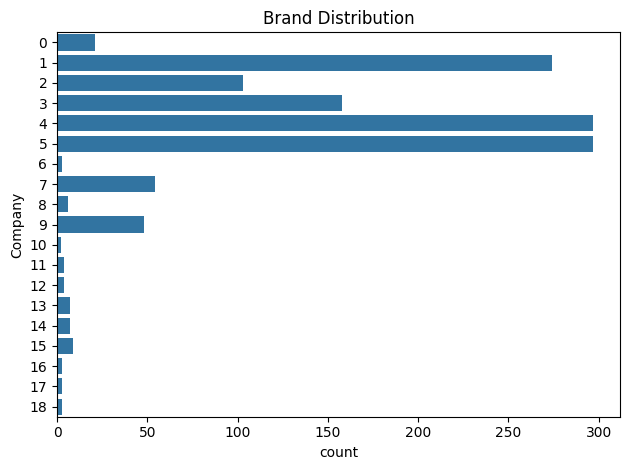

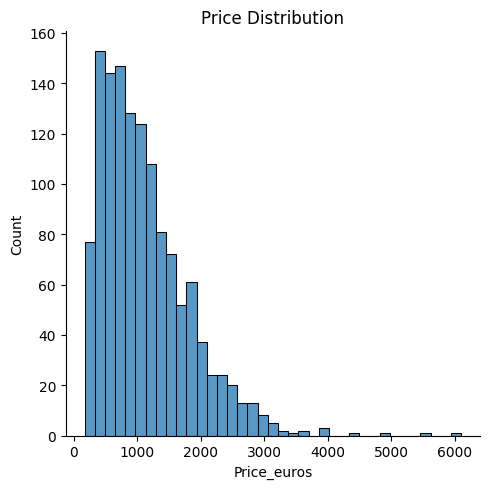

ValueError: Could not interpret value `ScreenResolution` for `y`. An entry with this name does not appear in `data`.

In [18]:
expData = ExpDataAnalysis(df)
expData.brand_analysis()
expData.getMissingValues()
expData.getBrandDistribution()
expData.getPriceDistribution()
expData.getScreenSizeDistribution()
expData.getCpuDistribution()
expData.getRamDistribution()
expData.getCompanyPriceRelation()
expData.getScreenSizePriceRelation()
expData.getCpuPriceRelation()
expData.getRamPriceRelation()
# expData.getCorrelationMatrix()
expData.getStatInsights()